# <font color = 'red'> **USA Housing price Prediction Using Linear Regression**

# <font color = 'green'> **Problem Statement**

We have given dataset about USA's housing prices based on which we need to build linear regression model 
And in the dataset we have 5000 data 

## <font color = 'green'> **Attribute Information.**
- **Avg. Area Income**
- **Avg. Area House Age**
- **Avg. Area Number of Rooms**
- **Avg. Area Number of Bedrooms**
- **Area Population**
- **Price**
- **Address**

# <font color = 'red'> **Import necessary libraries and read the dataset.**

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [136]:
original_data = pd.read_csv('USA_Housing.csv')

In [137]:
df = original_data.copy()

# <font color = 'red'> **Exploratory Data Analysis**

In [138]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [140]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [141]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

ADDRESS :  5000
523 Michael Orchard Suite 022\nMonicaborough, OR 92185-9530         1
78277 Christopher Highway Apt. 842\nPort Alexandratown, HI 78539    1
08651 Ryan Corner Apt. 064\nChristinemouth, WV 60090-0736           1
0857 Amanda Island Suite 827\nSouth Nathan, NJ 78071                1
3440 Cannon Lakes\nPort Melaniehaven, WA 60324-0399                 1
                                                                   ..
672 Samantha Stravenue Apt. 802\nEmilyshire, TX 04694               1
922 Mark Lodge\nMatthewton, ID 71131-3139                           1
52005 Smith Drive\nLeetown, NY 24822                                1
55543 Jones Parks Suite 227\nMarkport, VA 23752-6240                1
USNV Rhodes\nFPO AP 56575                                           1
Name: Address, Length: 5000, dtype: int64




In [142]:
# lets drop the id column as it is useless for the model
df = df.drop('Address', axis = 1)

In [143]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


## <font color = 'red'> **Data Preparation for model buidling.**

In [144]:
# Are there any missing values ?
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [145]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


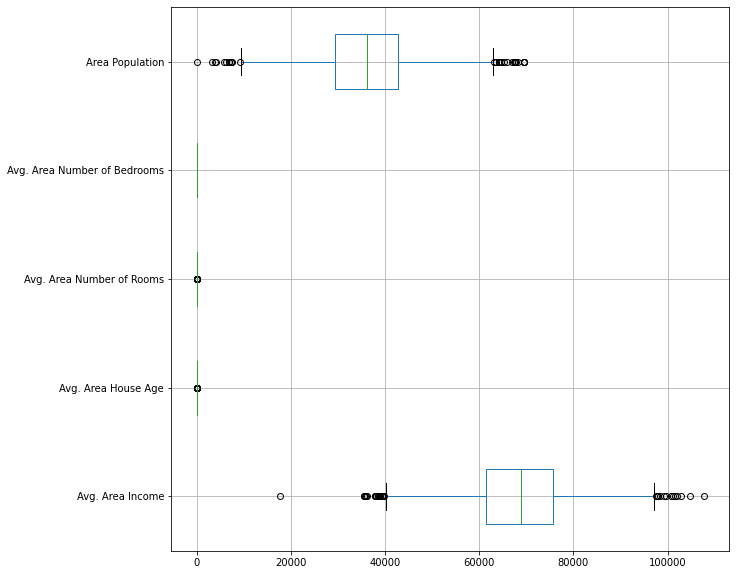

In [146]:
plt.figure(figsize = (10,10))
df.iloc[:, :5].boxplot(vert = 0)
plt.show()

In [147]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [148]:
for column in df.iloc[:, :5].columns:
    lr,ur = remove_outlier(df[column])
    df[column] = np.where(df[column] > ur, ur, df[column])
    df[column] = np.where(df[column] < lr, lr, df[column])

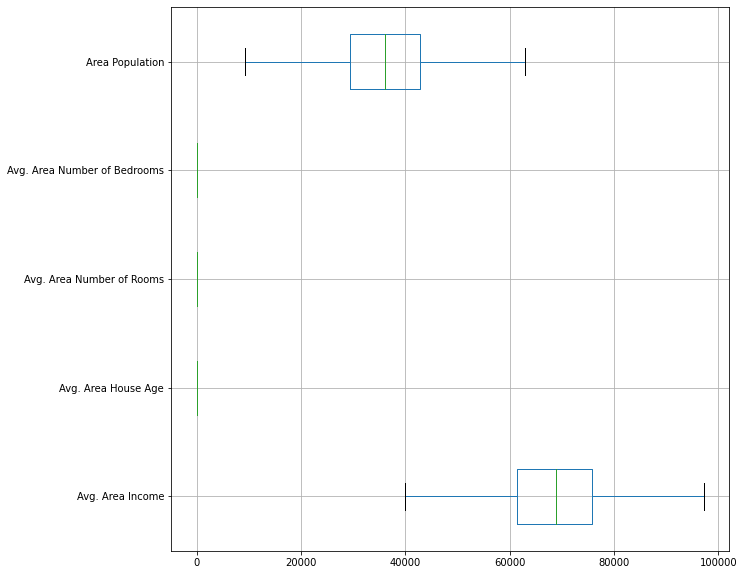

In [149]:
plt.figure(figsize=(10,10))
df.iloc[:, 0:5].boxplot(vert=0);

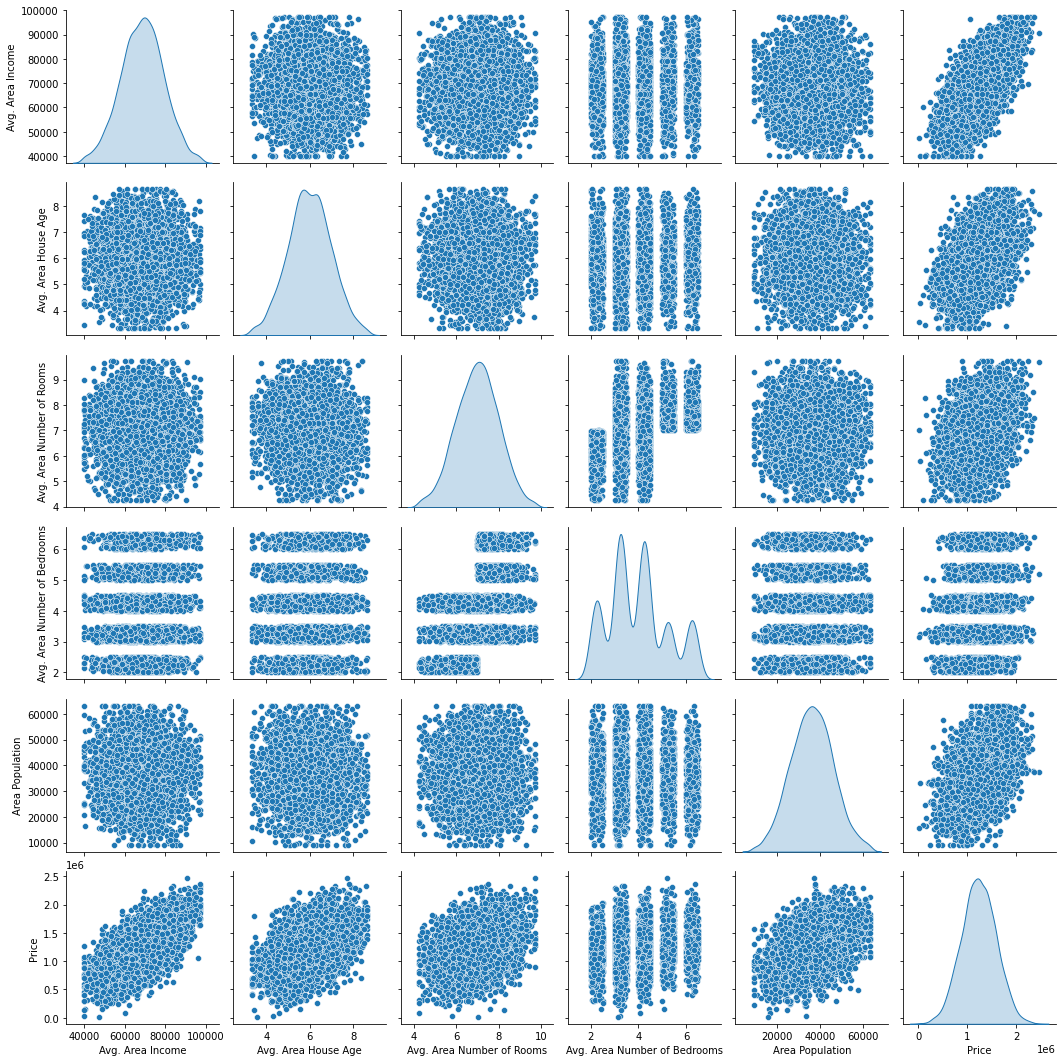

In [150]:
df_attr = (df.iloc[:, :])
sns.pairplot(df_attr, diag_kind='kde')   
plt.show()

In [176]:
corr_matrix = df.corr()

In [177]:
corr_matrix

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002800,-0.011739,0.019531,-0.014348,0.639394
Avg. Area House Age,-0.002800,1.000000,-0.009748,0.006645,-0.018191,0.452445
Avg. Area Number of Rooms,-0.011739,-0.009748,1.000000,0.463871,0.001400,0.335066
Avg. Area Number of Bedrooms,0.019531,0.006645,0.463871,1.000000,-0.022156,0.171071
Area Population,-0.014348,-0.018191,0.001400,-0.022156,1.000000,0.408805
Price,0.639394,0.452445,0.335066,0.171071,0.408805,1.000000


# <font color = 'orange' > **Here we can see that 'Avg.Area Income' highly co_related with dependent variable** 

# <font color = 'blue' > **No independent variable is highly co-related with each other so there is a less chance of multi-collinearity** 

<AxesSubplot: >

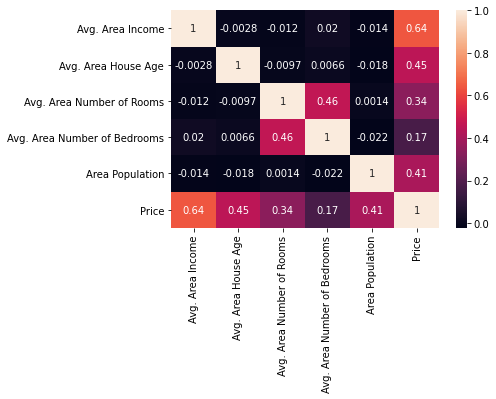

In [180]:
sns.heatmap(corr_matrix, annot =True)

In [152]:
X = df.drop('Price', axis = 1) # Copy all the predictor variables into X dataframe
y = df[['Price']]

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 , random_state = 1)

In [154]:
ss = StandardScaler()
X_train.iloc[:,:5] = ss.fit_transform(X_train.iloc[:,:5])
X_test.iloc[:,:5] = ss.fit_transform(X_test.iloc[:,:5])

In [155]:
X_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1334,-0.866230,-1.219052,0.573312,0.273574,-0.501495
4768,0.293341,-1.082977,0.238218,0.835091,0.315471
65,-1.145552,-0.554558,-0.460799,-0.686702,0.147163
177,-0.863179,-1.109686,-1.404723,-0.646012,0.815400
4489,-0.459558,2.145929,0.723172,1.933712,-0.486588


In [156]:
X_test.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2764,0.594775,0.802123,-0.408925,0.081200,0.673043
4767,0.703675,0.201322,0.145327,-0.544859,0.895856


## <font color ='red'> **Model Building**

In [157]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [158]:
regression_model.coef_

array([[228820.90495131, 165412.00197515, 121382.29178836,
          2044.64637395, 150425.67324914]])

In [159]:
regression_model.intercept_

array([1232402.80659849])

In [160]:
# if we want to access index information we use enumerate funtion
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Avg. Area Income is 228820.90495130775
The coefficient for Avg. Area House Age is 165412.00197514787
The coefficient for Avg. Area Number of Rooms is 121382.2917883577
The coefficient for Avg. Area Number of Bedrooms is 2044.646373954794
The coefficient for Area Population is 150425.67324913802


In [161]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1232402.8065984934


In [162]:
regression_model.score(X_train, y_train)

0.9176278850148573

In [163]:
regression_model.score(X_test, y_test)

0.9158789731078882

In [164]:
data_train = pd.concat([X_train, y_train], axis = 1)
data_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
1334,-0.866230,-1.219052,0.573312,0.273574,-0.501495,9.861132e+05
4768,0.293341,-1.082977,0.238218,0.835091,0.315471,1.228532e+06
65,-1.145552,-0.554558,-0.460799,-0.686702,0.147163,8.586856e+05
177,-0.863179,-1.109686,-1.404723,-0.646012,0.815400,8.942920e+05
4489,-0.459558,2.145929,0.723172,1.933712,-0.486588,1.558572e+06


In [165]:
data_train.rename(columns = {"Avg. Area Income": "Avg_Area_Income", "Avg. Area House Age": "Avg_Area_House_Age", 
                     "Avg. Area Number of Rooms": "Avg_Area_Number_of_Rooms","Avg. Area Number of Bedrooms" : "Avg_Area_Number_of_Bedrooms","Area Population": "Area_Population"}, 
                      inplace = True) 

In [166]:
data_train.columns

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population', 'Price'],
      dtype='object')

In [167]:
expr = 'Price ~ Avg_Area_Income + Avg_Area_House_Age + Avg_Area_Number_of_Rooms + Avg_Area_Number_of_Bedrooms + Area_Population'

In [168]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula = expr, data = data_train).fit()
lm1.params

Intercept                      1.232403e+06
Avg_Area_Income                2.288209e+05
Avg_Area_House_Age             1.654120e+05
Avg_Area_Number_of_Rooms       1.213823e+05
Avg_Area_Number_of_Bedrooms    2.044646e+03
Area_Population                1.504257e+05
dtype: float64

In [169]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     7785.
Date:                Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:48:03   Log-Likelihood:                -45295.
No. Observations:                3500   AIC:                         9.060e+04
Df Residuals:                    3494   BIC:                         9.064e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [170]:
y_train_pred = lm1.predict()

In [185]:
# here we are using rmse 
# is used to find out the error b/w actual values and predicted values
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))

100956.01879430209

In [173]:
# Prediction on Test data
y_test_pred = regression_model.predict(X_test)

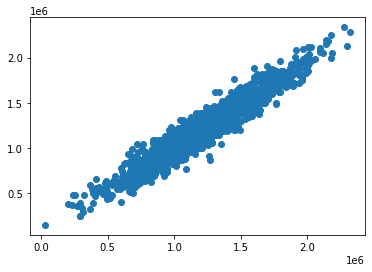

In [174]:
plt.scatter(y_test['Price'], y_test_pred)
plt.show()

In [175]:
np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

103298.01726736208

In [184]:
regression_model.score(X_test,y_test)

0.9158789731078882